# EDA

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_path = 'data/train.csv'

train_df = pd.read_csv(train_path)

In [10]:
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [11]:
train_df.shape

(75757, 64)

In [12]:
train_df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [13]:
# columns with NAs
nas = pd.DataFrame(train_df.isna().sum().sort_values(ascending=False)).rename(columns={0: 'counts'})
nas[nas.counts > 0]

,counts
days_with_fog,45796
direction_peak_wind_speed,41811
max_wind_speed,41082
direction_max_wind_speed,41082
energy_star_rating,26709
year_built,1837


## Descriptive stats

### 1) Numerical variables 

In [14]:
train_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [15]:
numeric = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_df_num = train_df.select_dtypes(include=numeric)

In [16]:
train_df_num.columns

Index(['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inches',
       'snowdepth_inches', 'avg_temp', 'days_below_3

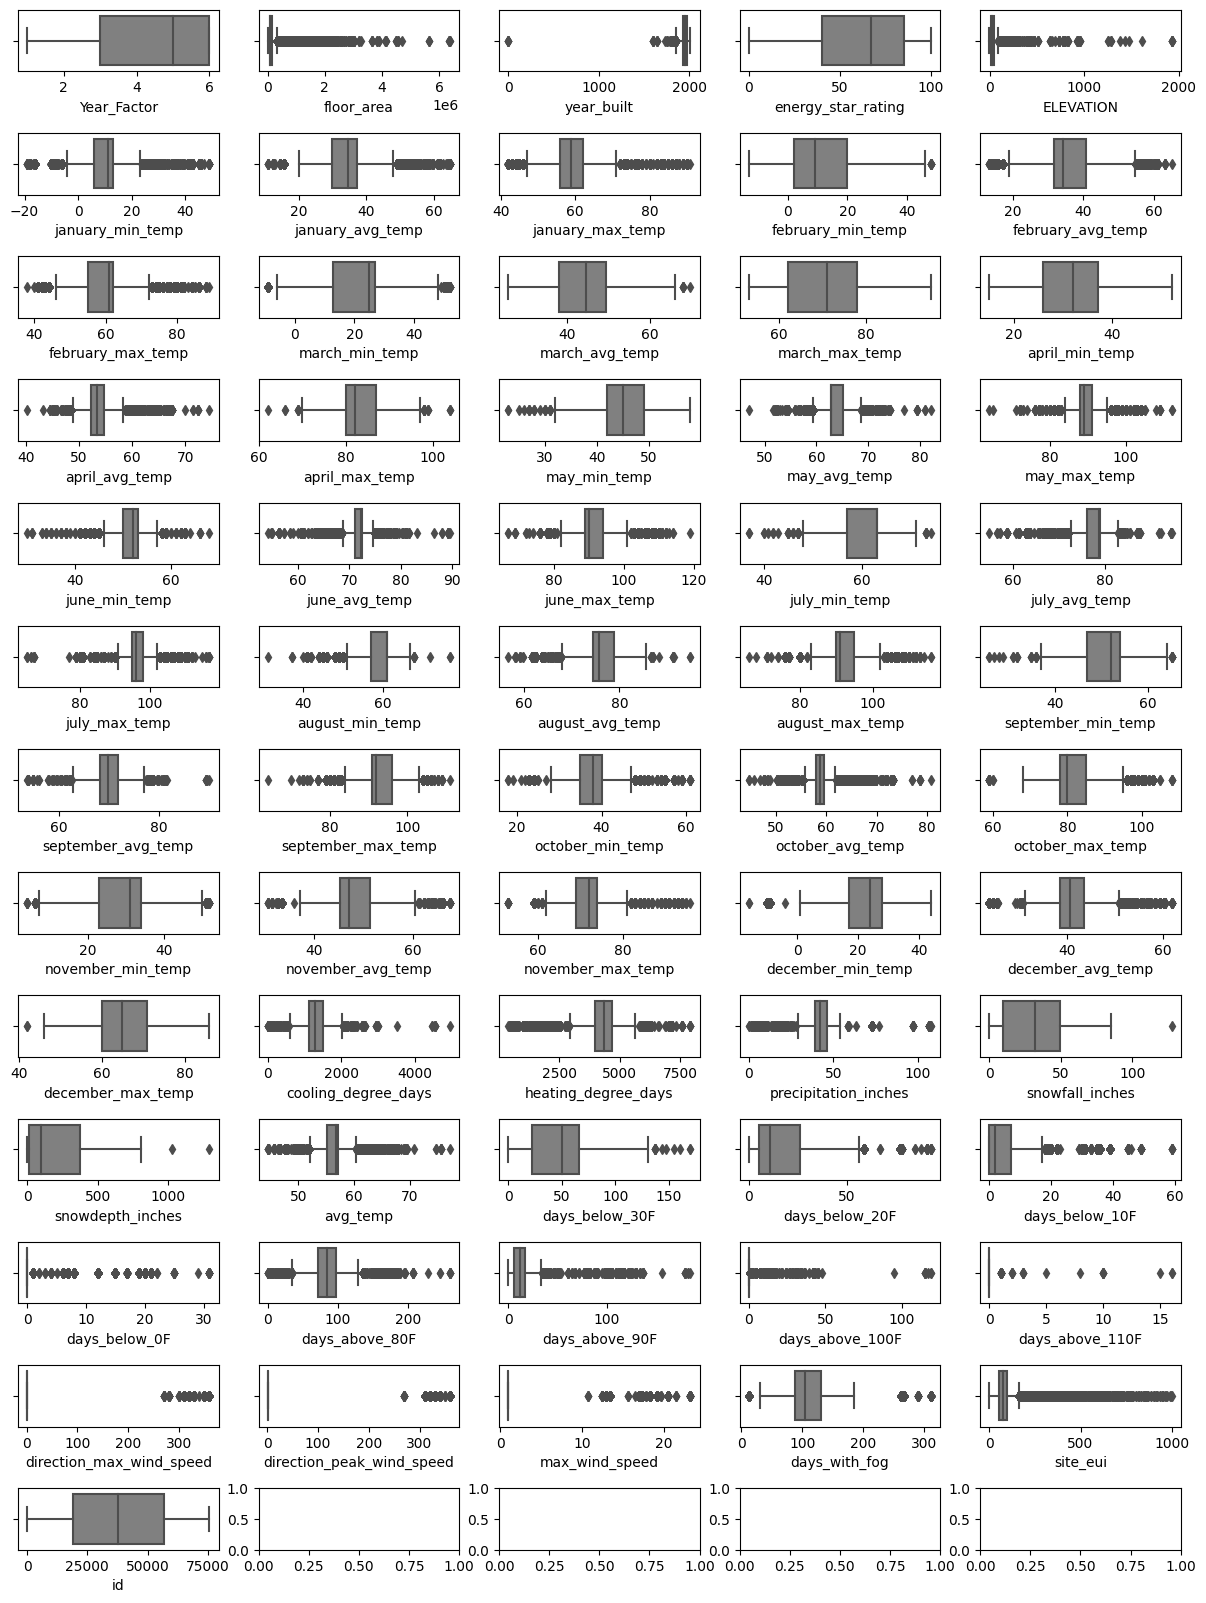

In [17]:
fig, axs = plt.subplots(13, 5, figsize=(15, 20))
for i, column in enumerate(train_df_num.columns):
    sns.boxplot(data=train_df_num, x=column, ax=axs[i//5, i%5], color='gray')
    # axs[i//5, i%5].set_title(column)
fig.subplots_adjust(hspace=1)


### 2) Categorical variables

In [18]:
train_df_cat = train_df.select_dtypes(exclude=numeric)
train_df_cat.columns

Index(['State_Factor', 'building_class', 'facility_type'], dtype='object')

In [19]:
state_count = train_df.groupby('State_Factor').agg({'State_Factor':'count'}).rename(columns={'State_Factor':'counts'}).reset_index().sort_values('counts', ascending=False)


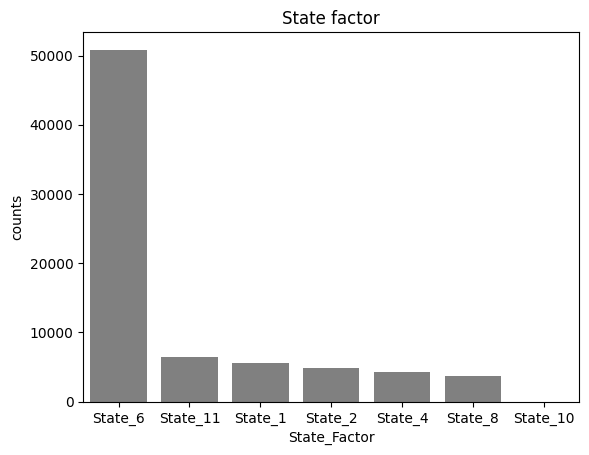

In [20]:
sns.barplot(data=state_count, x='State_Factor', y='counts', color='gray')
plt.title('State factor')
plt.show()

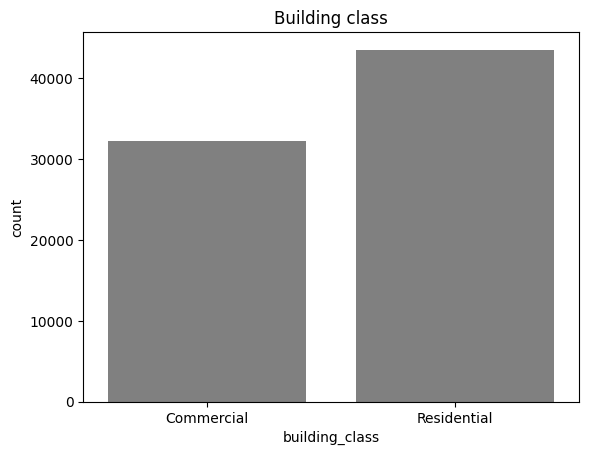

In [21]:
sns.countplot(data=train_df, x='building_class', color='gray')
plt.title('Building class')
plt.show()

In [22]:
fac_type_count = train_df.groupby('facility_type').agg({'facility_type':'count'}).rename(columns={'facility_type':'counts'}).reset_index().sort_values('counts', ascending=False)
fac_type_count['perc'] = fac_type_count.counts / fac_type_count.counts.sum()
fac_type_count['cum_perc'] = fac_type_count.perc.cumsum()


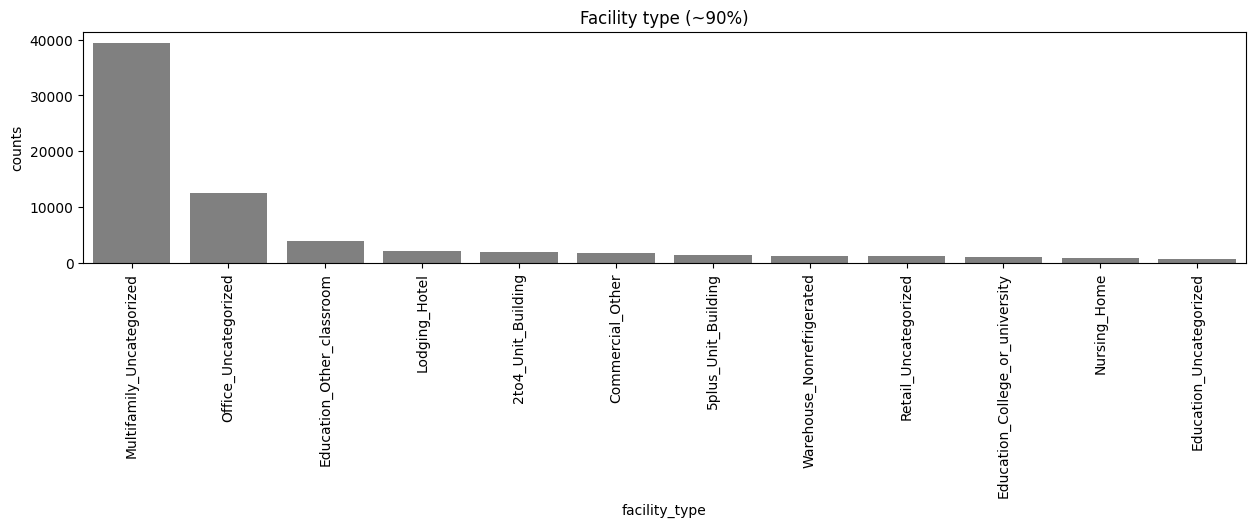

In [23]:
sns.barplot(data=fac_type_count[fac_type_count.cum_perc <= .9], x='facility_type', y='counts', color='gray')
plt.xticks(rotation=90)
plt.title('Facility type (~90%)')
fig = plt.gcf()
fig.set_size_inches(15, 3)
plt.show()

## Relationships between variables

In [25]:
temp_columns = [column for column in train_df_num.columns if 'temp' in column]
train_df_temp = train_df.filter(temp_columns)
corr_temp = train_df_temp.corr()

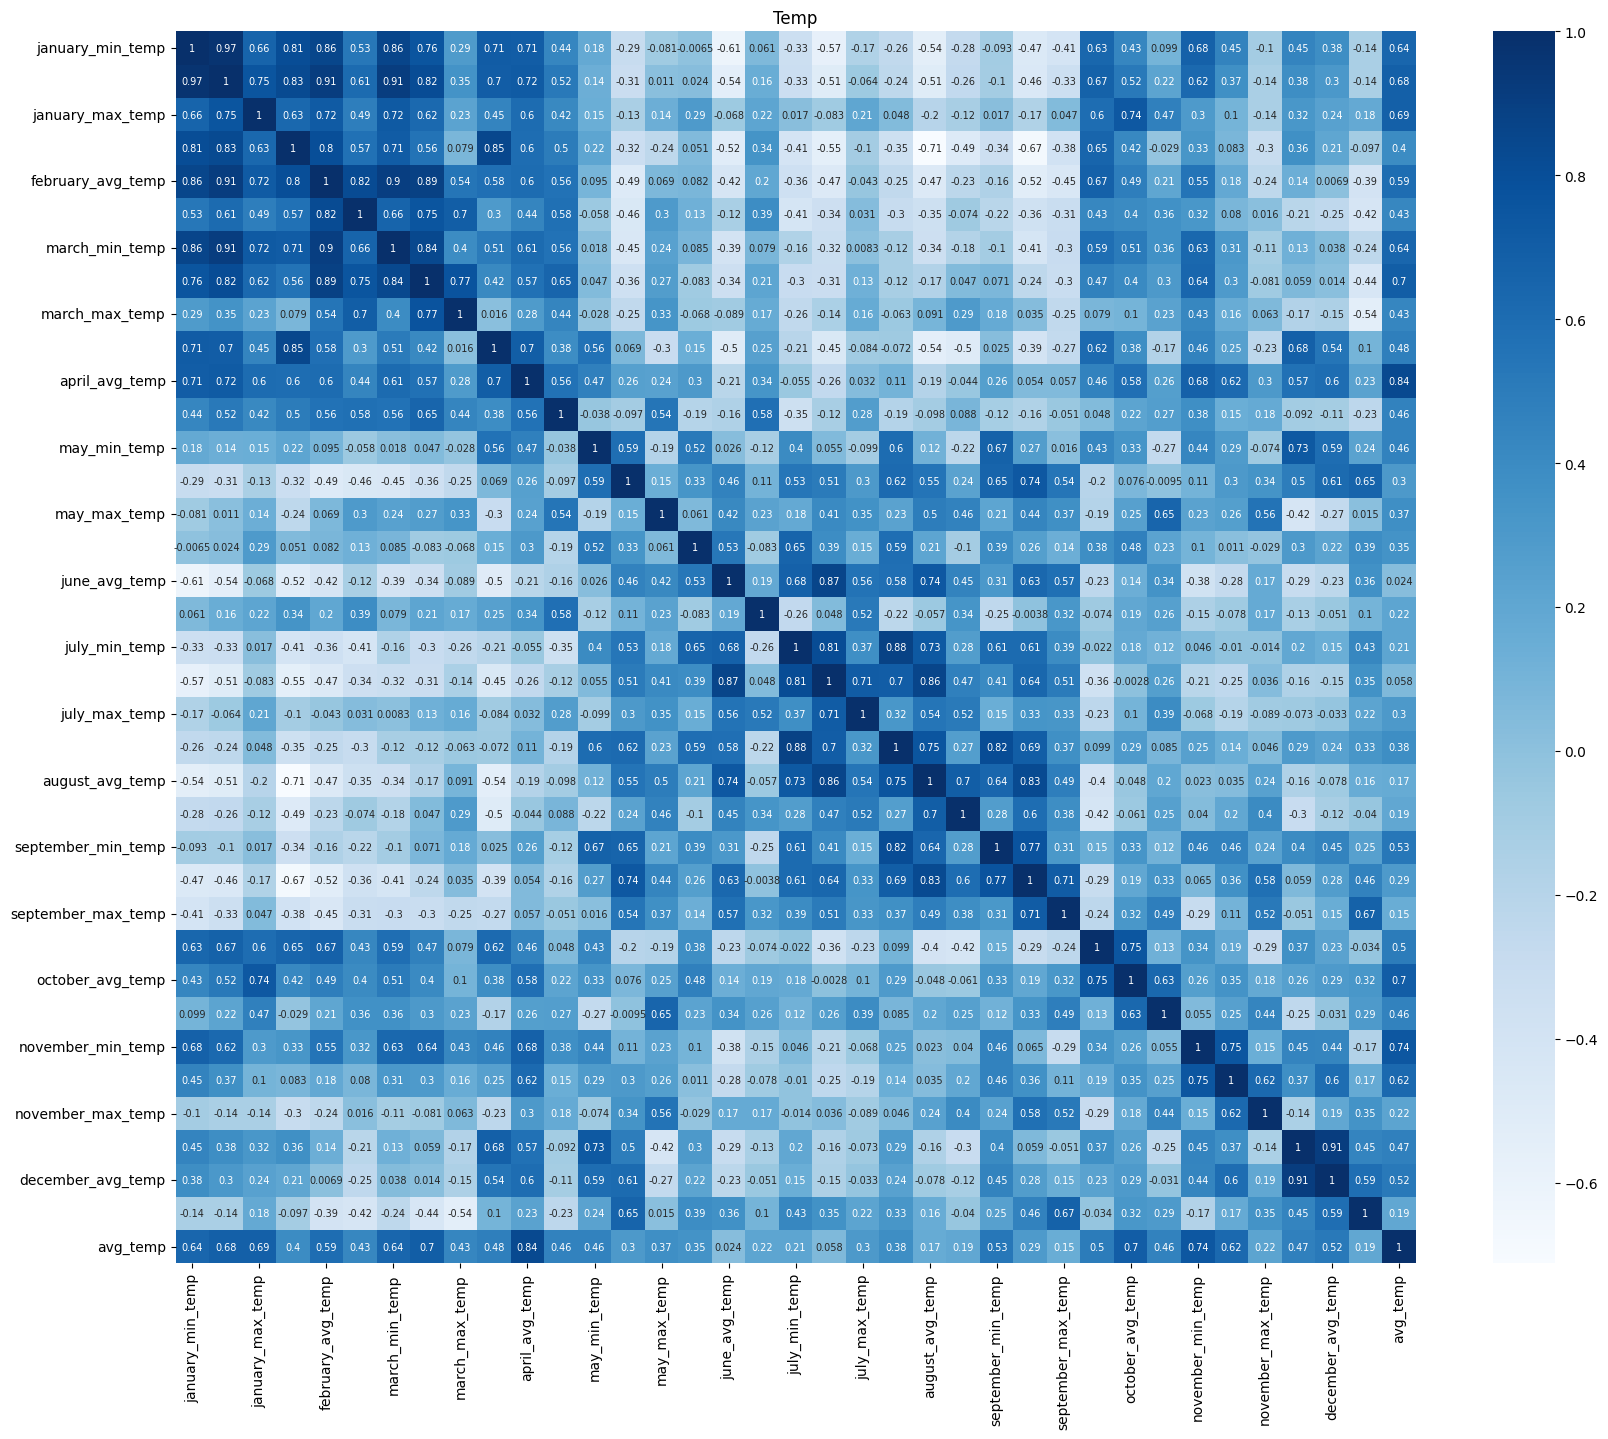

In [31]:
sns.heatmap(corr_temp, annot=True, annot_kws={'size':7}, cmap='Blues')
fig = plt.gcf()
fig.set_size_inches(20, 16)
plt.title('Temp')
plt.show()

In [28]:
other_columns = [column for column in train_df_num.columns if 'temp' not in column]
other_columns.append('avg_temp')
other_columns.remove('id')

In [29]:
corr_other = train_df_num.filter(other_columns).corr()

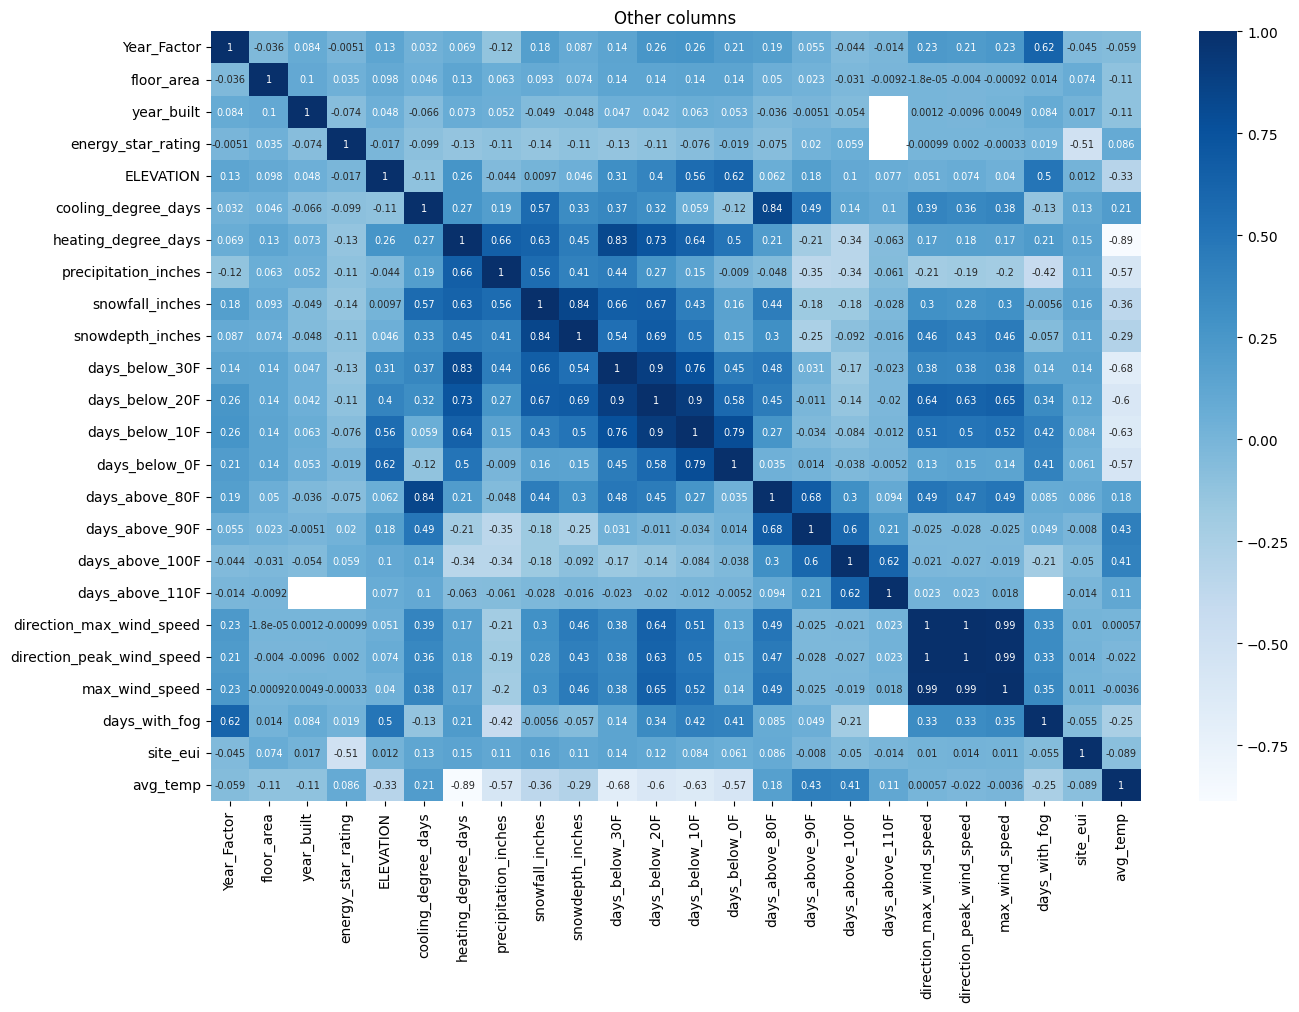

In [30]:
sns.heatmap(corr_other, annot=True, annot_kws={'size':7}, cmap='Blues')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title('Other columns')
plt.show()